## **Drive Mount**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

csv_path = "/content/drive/MyDrive/Colab Notebooks/cleaned_and_tokenized_and_entity-defined_healthcaremagic.csv"
df = pd.read_csv(csv_path)


## **Is the Dataset Cleaned?**

In [ ]:
print(df.head())

                                         query_clean  \
0  a woke up this morning feeling the whole room ...   
1  by baby has been pooing 5-6 times a day for a ...   
2  hello , by husband is taking oxycodone due to ...   
3  lump under left nipple and stomach pain ( male...   
4  a have a 5 month old baby who is very congeste...   

                                      response_clean  \
0  hi, thank you for posting your query. the most...   
1  hi... thank you for consulting in chat doctor....   
2  hello, and i hope i can help you today.first, ...   
3  hi. you have two different problems. the lump ...   
4  thank you for using chat doctor. i would sugge...   

                                     query_sentences  \
0  ['a woke up this morning feeling the whole roo...   
1  ['by baby has been pooing 5-6 times a day for ...   
2  ['hello , by husband is taking oxycodone due t...   
3  ['lump under left nipple and stomach pain ( ma...   
4  ['a have a 5 month old baby who is very con

In [ ]:
print(df[["query_clean", "response_clean"]].head(10))  # First 10 Q&A pairs


                                         query_clean  \
0  a woke up this morning feeling the whole room ...   
1  by baby has been pooing 5-6 times a day for a ...   
2  hello , by husband is taking oxycodone due to ...   
3  lump under left nipple and stomach pain ( male...   
4  a have a 5 month old baby who is very congeste...   
5  a am a 38 in good shape work out ( do triathlo...   
6  sir , of uncle has ild-interstitial lung disea...   
7  my husband was working on a project in the hou...   
8  hi my nine year old son had a cough and flu sy...   
9  gino problemsfor the past few months , a have ...   

                                      response_clean  
0  hi, thank you for posting your query. the most...  
1  hi... thank you for consulting in chat doctor....  
2  hello, and i hope i can help you today.first, ...  
3  hi. you have two different problems. the lump ...  
4  thank you for using chat doctor. i would sugge...  
5  hi, from history it seems that you might be ha... 

In [ ]:
print(df.columns.tolist())


['query_clean', 'response_clean', 'query_sentences', 'response_sentences', 'query_tokens', 'response_tokens', 'query_entities', 'response_entities']


In [ ]:
df.info()
df.describe(include='all')  # For summary stats


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112165 entries, 0 to 112164
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   query_clean         112164 non-null  object
 1   response_clean      112165 non-null  object
 2   query_sentences     112165 non-null  object
 3   response_sentences  112165 non-null  object
 4   query_tokens        112165 non-null  object
 5   response_tokens     112165 non-null  object
 6   query_entities      112165 non-null  object
 7   response_entities   112165 non-null  object
dtypes: object(8)
memory usage: 6.8+ MB


,query_clean,response_clean,query_sentences,response_sentences,query_tokens,response_tokens,query_entities,response_entities
count,112164,112165,112165,112165,112165,112165,112165,112165
unique,112140,110430,112141,110430,112141,110428,96551,60445
top,a 54-year-old type-a male business executive h...,hi... thank you for consulting in chat doctor....,['a 54-year-old type-a male business executive...,"['hi...', 'thank you for consulting in chat do...","['a', '54-year-old', 'type-a', 'male', 'busine...","['hi', '...', 'thank', 'you', 'for', 'consulti...","[[], [], [], []]","[[], [], [], [], [], [], []]"
freq,3,153,3,153,3,153,1798,5436


In [ ]:
df.isnull().sum()


,0
query_clean,1
response_clean,0
query_sentences,0
response_sentences,0
query_tokens,0
response_tokens,0
query_entities,0
response_entities,0


In [ ]:
df[["query_clean", "response_clean", "query_entities", "response_entities"]].sample(5)


,query_clean,response_clean,query_entities,response_entities
87510,a am concerned a am losing my hair or having i...,"hi dear, understanding your concern. as per yo...","[[], [('21', 'DATE')], [], [], [], [], [], [('...","[[], [], [], [], [], [], [('indian', 'NORP'), ..."
52843,a have a small lump under my armpit . there is...,"welcome to chat doctor .1. yes, it can be seri...","[[], [('2', 'CARDINAL')], [], [], [], []]","[[], [], [], [], [('4', 'CARDINAL')], [], [], ..."
4827,by father in law was diagnosed with small cell...,hi welcome to chat doctor i have gone through ...,"[[('september 2009', 'DATE'), ('september 2010...","[[], [], [], [('200', 'CARDINAL')], [('one', '..."
87370,"my daughter is eleven years old , december she...","hello, i can understand your problem. repeated...","[[('eleven years old', 'DATE'), ('december', '...","[[], [], [], [], [], [], [], [], []]"
29955,"i , may a answer your health queries right now...",thanks for your question on chat doctor. i can...,"[[], [('42 year old', 'DATE'), ('35.3c', 'CARD...","[[], [], [], [], [], [(""albuterol).don't"", 'CA..."


In [ ]:
import ast

df["num_query_entities"] = df["query_entities"].apply(lambda x: len(ast.literal_eval(str(x))))
df["num_response_entities"] = df["response_entities"].apply(lambda x: len(ast.literal_eval(str(x))))

df[["num_query_entities", "num_response_entities"]].describe()


,num_query_entities,num_response_entities
count,112165.000000,112165.000000
mean,5.152935,8.804386
std,3.638815,3.812210
min,0.000000,1.000000
25%,3.000000,6.000000
50%,5.000000,8.000000
75%,7.000000,11.000000
max,80.000000,54.000000


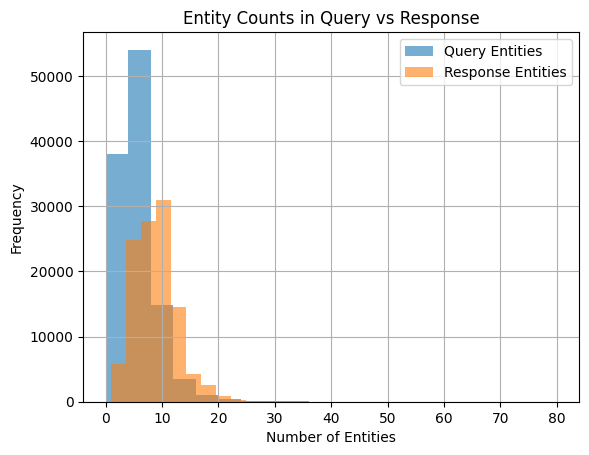

In [ ]:
import matplotlib.pyplot as plt

df["num_query_entities"].hist(bins=20, alpha=0.6, label='Query Entities')
df["num_response_entities"].hist(bins=20, alpha=0.6, label='Response Entities')
plt.title("Entity Counts in Query vs Response")
plt.xlabel("Number of Entities")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [ ]:
df["has_entities"] = (df["num_query_entities"] > 0) | (df["num_response_entities"] > 0)
print(df["has_entities"].value_counts())


has_entities
True    112165
Name: count, dtype: int64


In [ ]:
df["response_clean"].value_counts().head(10)


,count
response_clean,
"hi... thank you for consulting in chat doctor. skin conditions are best diagnosed only after seeing directly. i suggest you to upload photographs of the same on this website, so that i can guide you scientifically. hope my answer was helpful for you. i am happy to help any time. further clarifications and consultations on chat doctor are welcome. if you do not have any clarifications, you can close the discussion and rate the answer. wish your kid good health.",153
hi... thank you for consulting in chat doctor. it seems your kid is having viral diarrhea. once it starts it will take 5-7 days to completely get better. unless the kids having low urine output or very dull or excessively sleepy or blood in motion or green bilious vomiting...you need not worry. there is no need to use antibiotics unless there is blood in the motion. antibiotics might worsen if unnecessarily used causing antibiotic associated diarrhea. i suggest you use zinc supplements (z&d chat doctor.,95
"hi... thank you for consulting in chat doctor. cough and cold are viral 95% of the times in child chat doctor. for cold, you can use anti-allergics like cetirizine and for nose block, saline nasal decongestants will do. paracetamol can be given in the dose of 15 mg/kg/dose (max ceiling dose 500 mg) every 4-6th hourly, that too only if fever is more than 100f. i suggest not using combination medicines for fever, especially with paracetamol. for cold, you can use cetirizine at 0.25 mg/kg/dose every 12 hourly for 3 days. for nasal block, plain saline nasal",55
"hi hope this message finds u in good health. i have gone through your msg and understand your concern.it may be due to some sort of hormonal imbalances or variations in the body, though there may be other reasons as reclothing to worry about, you should eventually get back to normal. take multi vitamin and calcium supplements do consult a gynecologist if symptoms worsened back to me for any follow-up queries anytime. chat doctor. .(mbbs, ms,mch)",51
"hi... thank you for consulting in chat doctor. fever of few days without any localizing signs could as well a viral illness. usually rather than fever, what is more important is the activity of the child, in between 2 fever episodes on the same day. if the kid is active and playing around when there is no fever, it is probably viral illness and it doesn't require antibiotics at all. once viral fever comes it will there for 4-7 days. so do not worry about duration if the kid is active. paracetamol can be given in the dose of 15 mg/kg/dose (maximum ceiling dose of 500 mg) every 4-6th hourly that too only if fever is more than 100f. i suggest not using combination medicines for fever, especially with paracetamol. hope my answer was helpful for you. i am happy to help any time. further clarifications and consultations on chat doctor are welcome. if you do not have any clarifications, you can close the discussion and rate the answer. wish your kid good health.",38
hi... i feel by what you quote he should be having a - hand foot mouth disease. this is one viral illness among all other anthems which can cause fever followed by rash over palms and soles. it is a self-limiting disorder and itching can be really worrisome. i suggest you use any over the counter antihistamine if you have one with you now. you can use hy chat doctor. this can even cause some peeling of skin in the next 4-6 weeks and do not worry about it. regards -,35
"hello, thank you for posting on chat doctor. the condition you have referred to is called urticaria or hives. it's an allergic manifestation of skin, where an allergen leads to release of certain substances from your blood, leading to itchy skin rash and swelling over soft tissues. its proper management requires thorough history, clinical and laboratory work-up. you may have to go for specific tests like patch test, food prick test, ige antibody levels etc. as for treatment part, best would be the avoidance of allergen 

In [ ]:
df = df.dropna(subset=["query_clean"])  # Clean it now


In [ ]:
df.isnull().sum()

,0
query_clean,0
response_clean,0
query_sentences,0
response_sentences,0
query_tokens,0
response_tokens,0
query_entities,0
response_entities,0
num_query_entities,0
num_response_entities,0


## **Installing Haystack Tool**

In [ ]:
!pip install -q haystack
!pip install -q farm-haystack[colab]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 688.1/688.1 kB 26.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.6/179.6 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 MB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.7/48.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.4/764.4 kB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.9/117.9 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 27.4 MB/s eta 0:00:00


In [ ]:
from haystack.document_stores import InMemoryDocumentStore
from haystack.nodes import BM25Retriever

print("✅ Haystack BM25 is ready to use!")

✅ Haystack BM25 is ready to use!


In [ ]:
!pip install scikit-learn==1.3.2 --upgrade --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 19.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.3.2 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
albumentations 2.0.8 requires pydantic>=2.9.2, but you have pydantic 1.10.22 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
gradio 5.42.0 requires pydantic<2.12,>=2.0, but you have pydantic 1.10.22 which is incompatible.
cuml-cu12 25.6.0 requires sc

In [ ]:
from haystack.document_stores import InMemoryDocumentStore
from haystack.nodes import BM25Retriever

print("✅ Haystack BM25 is ready to use!")


✅ Haystack BM25 is ready to use!


## **Prerequisite**

In [ ]:
# Run this only once in a fresh runtime after installing haystack==1.18.0 and transformers==4.30.1
from haystack.document_stores import InMemoryDocumentStore
from haystack.nodes import BM25Retriever
import pandas as pd


## **Step 1: Load the Cleaned Dataset**

In [ ]:
# Drop rows with missing queries or responses (edge cases)
df = df.dropna(subset=["query_clean", "response_clean"])
df = df.reset_index(drop=True)

## **Step 2: Convert to Haystack Document Format**

In [ ]:
# Haystack requires documents in this format:
# {"content": <text>, "meta": {"id": <some_id>}}

docs = [
    {"content": row["response_clean"], "meta": {"id": idx}}
    for idx, row in df.iterrows()
]

print(f"✅ Prepared {len(docs)} documents for indexing.")


✅ Prepared 112164 documents for indexing.


## **Step 3: Create an In-Memory BM25 Document Store**

In [ ]:
# Create an in-memory document store with BM25 enabled
document_store = InMemoryDocumentStore(use_bm25=True)

# Write documents into the store
document_store.write_documents(docs)

print("✅ Indexed documents using BM25.")


Updating BM25 representation...: 100%|██████████| 110429/110429 [00:06<00:00, 16255.41 docs/s]


✅ Indexed documents using BM25.


## **Step 4: Initialize the BM25 Retriever**

In [ ]:
# Create the retriever using the BM25 scoring function
retriever = BM25Retriever(document_store=document_store)

# Example query (from dataset or typed manually)
query = "what causes dizziness when waking up?"

# Retrieve top 3 documents
top_k = 3
results = retriever.retrieve(query=query, top_k=top_k)

# Display results
for i, doc in enumerate(results, 1):
    print(f"\n🔹 Rank {i} (Document ID: {doc.meta['id']})")
    print(doc.content[:400] + "...")
    print("-" * 60)



🔹 Rank 1 (Document ID: 8399)
tiredness and dizziness can be caused by low blood sugar/ low blood pressure/ or low hemoglobin (anemia). dizziness on waking up or sudden change in posture can be due to postural hypotension. coming to your query, nutritional deficiencies like iron/ vitaminb12/ folic acid. you can get a complete hologram to know if there is any problem with counts, also get your blood sugar and blood pressure che...
------------------------------------------------------------

🔹 Rank 2 (Document ID: 76565)
the only way to keep your baby from waking up at nights is to delay his night feed when he wakes up, by up to 5-10 minutes each night, till he stops waking up. for example, if he wakes up at 1.05 am, let him wait till 1.10 before indulging his desire; the next night, let him wait for 10 minutes; the next, 15 minutes, and so on. gradually, he will stop waking up at night. it will be a tough 15 days...
------------------------------------------------------------

🔹 Rank 3

In [ ]:
print(f"Total valid queries in dataset: {len(df)}")


Total valid queries in dataset: 112164


## **bm25 Batch processing(for 50k data)**

In [ ]:
start_idx = 0  # change to last saved + 1
batch_size = 1000
output_base_path = "/content/drive/MyDrive/bm25_batches"

# Ensure save dir exists
import os
os.makedirs(output_base_path, exist_ok=True)

for i in range(start_idx, len(selected_df), batch_size):
    batch_df = selected_df.iloc[i:i+batch_size]
    output_file = f"{output_base_path}/bm25_batch_{i}_{i+len(batch_df)}.csv"

    if os.path.exists(output_file):
        print(f"⏩ Skipping existing batch → {output_file}")
        continue

    rows = []
    for _, row in tqdm(batch_df.iterrows(), total=len(batch_df), desc=f"Processing {i}-{i+len(batch_df)}"):
        query = row["query_clean"]
        top_docs = retriever.retrieve(query=query, top_k=3)
        for rank, doc in enumerate(top_docs, 1):
            rows.append({
                "query": query,
                "rank": rank,
                "doc_id": doc.meta["id"],
                "response": doc.content
            })

    pd.DataFrame(rows).to_csv(output_file, index=False)
    print(f"✅ Saved batch → {output_file}")


Processing 0-1000: 100%|██████████| 1000/1000 [1:11:05<00:00,  4.27s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_0_1000.csv


Processing 1000-2000: 100%|██████████| 1000/1000 [1:12:50<00:00,  4.37s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_1000_2000.csv


Processing 2000-3000: 100%|██████████| 1000/1000 [1:12:59<00:00,  4.38s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_2000_3000.csv


Processing 3000-4000: 100%|██████████| 1000/1000 [1:16:08<00:00,  4.57s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_3000_4000.csv


Processing 4000-5000: 100%|██████████| 1000/1000 [1:11:02<00:00,  4.26s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_4000_5000.csv


Processing 5000-6000: 100%|██████████| 1000/1000 [1:12:30<00:00,  4.35s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_5000_6000.csv


Processing 6000-7000: 100%|██████████| 1000/1000 [1:09:39<00:00,  4.18s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_6000_7000.csv


Processing 7000-8000: 100%|██████████| 1000/1000 [1:09:06<00:00,  4.15s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_7000_8000.csv


Processing 8000-9000: 100%|██████████| 1000/1000 [1:09:24<00:00,  4.16s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_8000_9000.csv


Processing 9000-10000:  86%|████████▋ | 863/1000 [59:49<11:22,  4.98s/it]

In [ ]:
import os
import pandas as pd
from tqdm import tqdm
from haystack.nodes import BM25Retriever

# ✅ Load your dataset again
csv_path = "/content/drive/MyDrive/Colab Notebooks/cleaned_and_tokenized_and_entity-defined_healthcaremagic.csv"
df = pd.read_csv(csv_path)

# ✅ Select the first N rows (adjust N as needed)
N = 56082
selected_df = df.iloc[:N]

# ✅ Initialize BM25 retriever again
retriever = BM25Retriever(document_store=document_store)  # make sure document_store is loaded

# ✅ Resume parameters
start_idx = 9000  # set this to where it stopped
batch_size = 1000
output_base_path = "/content/drive/MyDrive/bm25_batches"
os.makedirs(output_base_path, exist_ok=True)

# ✅ Resume loop
for i in range(start_idx, len(selected_df), batch_size):
    batch_df = selected_df.iloc[i:i+batch_size]
    output_file = f"{output_base_path}/bm25_batch_{i}_{i+len(batch_df)}.csv"

    # Skip if already processed
    if os.path.exists(output_file):
        print(f"⏩ Skipping existing batch → {output_file}")
        continue

    rows = []
    for _, row in tqdm(batch_df.iterrows(), total=len(batch_df), desc=f"Processing {i}-{i+len(batch_df)}"):
        query = row["query_clean"]
        top_docs = retriever.retrieve(query=query, top_k=3)
        for rank, doc in enumerate(top_docs, 1):
            rows.append({
                "query": query,
                "rank": rank,
                "doc_id": doc.meta["id"],
                "response": doc.content
            })

    pd.DataFrame(rows).to_csv(output_file, index=False)
    print(f"✅ Saved batch → {output_file}")


Processing 9000-10000: 100%|██████████| 1000/1000 [1:05:40<00:00,  3.94s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_9000_10000.csv


Processing 10000-11000: 100%|██████████| 1000/1000 [1:07:23<00:00,  4.04s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_10000_11000.csv


Processing 11000-12000: 100%|██████████| 1000/1000 [1:07:01<00:00,  4.02s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_11000_12000.csv


Processing 12000-13000:  97%|█████████▋| 969/1000 [1:07:17<02:29,  4.81s/it]

In [ ]:
import os
import pandas as pd
from tqdm import tqdm
from haystack.nodes import BM25Retriever

# ✅ Load your dataset again
csv_path = "/content/drive/MyDrive/Colab Notebooks/cleaned_and_tokenized_and_entity-defined_healthcaremagic.csv"
df = pd.read_csv(csv_path)

# ✅ Select the first N rows (adjust N as needed)
N = 56082
selected_df = df.iloc[:N]

# ✅ Initialize BM25 retriever again
retriever = BM25Retriever(document_store=document_store)  # make sure document_store is loaded

# ✅ Resume parameters
start_idx = 12000  # set this to where it stopped
batch_size = 1000
output_base_path = "/content/drive/MyDrive/bm25_batches"
os.makedirs(output_base_path, exist_ok=True)

# ✅ Resume loop
for i in range(start_idx, len(selected_df), batch_size):
    batch_df = selected_df.iloc[i:i+batch_size]
    output_file = f"{output_base_path}/bm25_batch_{i}_{i+len(batch_df)}.csv"

    # Skip if already processed
    if os.path.exists(output_file):
        print(f"⏩ Skipping existing batch → {output_file}")
        continue

    rows = []
    for _, row in tqdm(batch_df.iterrows(), total=len(batch_df), desc=f"Processing {i}-{i+len(batch_df)}"):
        query = row["query_clean"]
        top_docs = retriever.retrieve(query=query, top_k=3)
        for rank, doc in enumerate(top_docs, 1):
            rows.append({
                "query": query,
                "rank": rank,
                "doc_id": doc.meta["id"],
                "response": doc.content
            })

    pd.DataFrame(rows).to_csv(output_file, index=False)
    print(f"✅ Saved batch → {output_file}")


Processing 12000-13000: 100%|██████████| 1000/1000 [1:17:57<00:00,  4.68s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_12000_13000.csv


Processing 13000-14000: 100%|██████████| 1000/1000 [1:19:16<00:00,  4.76s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_13000_14000.csv


Processing 14000-15000: 100%|██████████| 1000/1000 [1:13:11<00:00,  4.39s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_14000_15000.csv


Processing 15000-16000: 100%|██████████| 1000/1000 [1:12:39<00:00,  4.36s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_15000_16000.csv


Processing 16000-17000: 100%|██████████| 1000/1000 [1:16:21<00:00,  4.58s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_16000_17000.csv


Processing 17000-18000: 100%|██████████| 1000/1000 [1:14:47<00:00,  4.49s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_17000_18000.csv


Processing 18000-19000: 100%|██████████| 1000/1000 [1:10:54<00:00,  4.25s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_18000_19000.csv


Processing 19000-20000: 100%|██████████| 1000/1000 [1:09:36<00:00,  4.18s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_19000_20000.csv


Processing 20000-21000: 100%|██████████| 1000/1000 [1:09:28<00:00,  4.17s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_20000_21000.csv


Processing 21000-22000:  48%|████▊     | 484/1000 [36:36<44:45,  5.20s/it]

In [ ]:
import os
import pandas as pd
from tqdm import tqdm
from haystack.nodes import BM25Retriever

# ✅ Load your dataset again
csv_path = "/content/drive/MyDrive/Colab Notebooks/cleaned_and_tokenized_and_entity-defined_healthcaremagic.csv"
df = pd.read_csv(csv_path)

# ✅ Select the first N rows (adjust N as needed)
N = 56082
selected_df = df.iloc[:N]

# ✅ Initialize BM25 retriever again
retriever = BM25Retriever(document_store=document_store)  # make sure document_store is loaded

# ✅ Resume parameters
start_idx = 21000  # set this to where it stopped
batch_size = 1000
output_base_path = "/content/drive/MyDrive/bm25_batches"
os.makedirs(output_base_path, exist_ok=True)

# ✅ Resume loop
for i in range(start_idx, len(selected_df), batch_size):
    batch_df = selected_df.iloc[i:i+batch_size]
    output_file = f"{output_base_path}/bm25_batch_{i}_{i+len(batch_df)}.csv"

    # Skip if already processed
    if os.path.exists(output_file):
        print(f"⏩ Skipping existing batch → {output_file}")
        continue

    rows = []
    for _, row in tqdm(batch_df.iterrows(), total=len(batch_df), desc=f"Processing {i}-{i+len(batch_df)}"):
        query = row["query_clean"]
        top_docs = retriever.retrieve(query=query, top_k=3)
        for rank, doc in enumerate(top_docs, 1):
            rows.append({
                "query": query,
                "rank": rank,
                "doc_id": doc.meta["id"],
                "response": doc.content
            })

    pd.DataFrame(rows).to_csv(output_file, index=False)
    print(f"✅ Saved batch → {output_file}")


Processing 21000-22000: 100%|██████████| 1000/1000 [1:17:49<00:00,  4.67s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_21000_22000.csv


Processing 22000-23000: 100%|██████████| 1000/1000 [1:19:29<00:00,  4.77s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_22000_23000.csv


Processing 23000-24000: 100%|██████████| 1000/1000 [1:17:35<00:00,  4.66s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_23000_24000.csv


Processing 24000-25000: 100%|██████████| 1000/1000 [1:18:02<00:00,  4.68s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_24000_25000.csv


Processing 25000-26000: 100%|██████████| 1000/1000 [1:17:59<00:00,  4.68s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_25000_26000.csv


Processing 26000-27000: 100%|██████████| 1000/1000 [1:19:01<00:00,  4.74s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_26000_27000.csv


Processing 27000-28000: 100%|██████████| 1000/1000 [1:18:47<00:00,  4.73s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_27000_28000.csv


Processing 28000-29000: 100%|██████████| 1000/1000 [1:17:20<00:00,  4.64s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_28000_29000.csv


Processing 29000-30000:  96%|█████████▋| 963/1000 [1:14:29<02:12,  3.57s/it]

In [ ]:
import os
import pandas as pd
from tqdm import tqdm
from haystack.nodes import BM25Retriever

# ✅ Load your dataset again
csv_path = "/content/drive/MyDrive/Colab Notebooks/cleaned_and_tokenized_and_entity-defined_healthcaremagic.csv"
df = pd.read_csv(csv_path)

# ✅ Select the first N rows (adjust N as needed)
N = 56082
selected_df = df.iloc[:N]

# ✅ Initialize BM25 retriever again
retriever = BM25Retriever(document_store=document_store)  # make sure document_store is loaded

# ✅ Resume parameters
start_idx = 29000  # set this to where it stopped
batch_size = 1000
output_base_path = "/content/drive/MyDrive/bm25_batches"
os.makedirs(output_base_path, exist_ok=True)

# ✅ Resume loop
for i in range(start_idx, len(selected_df), batch_size):
    batch_df = selected_df.iloc[i:i+batch_size]
    output_file = f"{output_base_path}/bm25_batch_{i}_{i+len(batch_df)}.csv"

    # Skip if already processed
    if os.path.exists(output_file):
        print(f"⏩ Skipping existing batch → {output_file}")
        continue

    rows = []
    for _, row in tqdm(batch_df.iterrows(), total=len(batch_df), desc=f"Processing {i}-{i+len(batch_df)}"):
        query = row["query_clean"]
        top_docs = retriever.retrieve(query=query, top_k=3)
        for rank, doc in enumerate(top_docs, 1):
            rows.append({
                "query": query,
                "rank": rank,
                "doc_id": doc.meta["id"],
                "response": doc.content
            })

    pd.DataFrame(rows).to_csv(output_file, index=False)
    print(f"✅ Saved batch → {output_file}")


Processing 29000-30000: 100%|██████████| 1000/1000 [1:10:00<00:00,  4.20s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_29000_30000.csv


Processing 30000-31000: 100%|██████████| 1000/1000 [1:10:29<00:00,  4.23s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_30000_31000.csv


Processing 31000-32000: 100%|██████████| 1000/1000 [1:12:06<00:00,  4.33s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_31000_32000.csv


Processing 32000-33000: 100%|██████████| 1000/1000 [1:11:06<00:00,  4.27s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_32000_33000.csv


Processing 33000-34000: 100%|██████████| 1000/1000 [1:08:49<00:00,  4.13s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_33000_34000.csv


Processing 34000-35000: 100%|██████████| 1000/1000 [1:09:59<00:00,  4.20s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_34000_35000.csv


Processing 35000-36000: 100%|██████████| 1000/1000 [1:10:29<00:00,  4.23s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_35000_36000.csv


Processing 36000-37000: 100%|██████████| 1000/1000 [1:09:58<00:00,  4.20s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_36000_37000.csv


Processing 37000-38000: 100%|██████████| 1000/1000 [1:09:04<00:00,  4.14s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_37000_38000.csv


Processing 38000-39000:  85%|████████▌ | 850/1000 [1:00:34<08:33,  3.42s/it]

In [ ]:
import os
import pandas as pd
from tqdm import tqdm
from haystack.nodes import BM25Retriever

# ✅ Load your dataset again
csv_path = "/content/drive/MyDrive/Colab Notebooks/cleaned_and_tokenized_and_entity-defined_healthcaremagic.csv"
df = pd.read_csv(csv_path)

# ✅ Select the first N rows (adjust N as needed)
N = 56082
selected_df = df.iloc[:N]

# ✅ Initialize BM25 retriever again
retriever = BM25Retriever(document_store=document_store)  # make sure document_store is loaded

# ✅ Resume parameters
start_idx = 38000  # set this to where it stopped
batch_size = 1000
output_base_path = "/content/drive/MyDrive/bm25_batches"
os.makedirs(output_base_path, exist_ok=True)

# ✅ Resume loop
for i in range(start_idx, len(selected_df), batch_size):
    batch_df = selected_df.iloc[i:i+batch_size]
    output_file = f"{output_base_path}/bm25_batch_{i}_{i+len(batch_df)}.csv"

    # Skip if already processed
    if os.path.exists(output_file):
        print(f"⏩ Skipping existing batch → {output_file}")
        continue

    rows = []
    for _, row in tqdm(batch_df.iterrows(), total=len(batch_df), desc=f"Processing {i}-{i+len(batch_df)}"):
        query = row["query_clean"]
        top_docs = retriever.retrieve(query=query, top_k=3)
        for rank, doc in enumerate(top_docs, 1):
            rows.append({
                "query": query,
                "rank": rank,
                "doc_id": doc.meta["id"],
                "response": doc.content
            })

    pd.DataFrame(rows).to_csv(output_file, index=False)
    print(f"✅ Saved batch → {output_file}")


Processing 38000-39000: 100%|██████████| 1000/1000 [1:13:32<00:00,  4.41s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_38000_39000.csv


Processing 39000-40000: 100%|██████████| 1000/1000 [1:11:06<00:00,  4.27s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_39000_40000.csv


Processing 40000-41000: 100%|██████████| 1000/1000 [1:12:12<00:00,  4.33s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_40000_41000.csv


Processing 41000-42000: 100%|██████████| 1000/1000 [1:12:31<00:00,  4.35s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_41000_42000.csv


Processing 42000-43000: 100%|██████████| 1000/1000 [1:10:32<00:00,  4.23s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_42000_43000.csv


Processing 43000-44000: 100%|██████████| 1000/1000 [1:13:29<00:00,  4.41s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_43000_44000.csv


Processing 44000-45000: 100%|██████████| 1000/1000 [1:10:44<00:00,  4.24s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_44000_45000.csv


Processing 45000-46000: 100%|██████████| 1000/1000 [1:14:39<00:00,  4.48s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_45000_46000.csv


Processing 46000-47000: 100%|██████████| 1000/1000 [1:12:23<00:00,  4.34s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_46000_47000.csv


Processing 47000-48000:  12%|█▏        | 124/1000 [08:53<1:05:51,  4.51s/it]

In [ ]:
import os
import pandas as pd
from tqdm import tqdm
from haystack.nodes import BM25Retriever

# ✅ Load your dataset again
csv_path = "/content/drive/MyDrive/Colab Notebooks/cleaned_and_tokenized_and_entity-defined_healthcaremagic.csv"
df = pd.read_csv(csv_path)

# ✅ Select the first N rows (adjust N as needed)
N = 56082
selected_df = df.iloc[:N]

# ✅ Initialize BM25 retriever again
retriever = BM25Retriever(document_store=document_store)  # make sure document_store is loaded

# ✅ Resume parameters
start_idx = 47000  # set this to where it stopped
batch_size = 1000
output_base_path = "/content/drive/MyDrive/bm25_batches"
os.makedirs(output_base_path, exist_ok=True)

# ✅ Resume loop
for i in range(start_idx, len(selected_df), batch_size):
    batch_df = selected_df.iloc[i:i+batch_size]
    output_file = f"{output_base_path}/bm25_batch_{i}_{i+len(batch_df)}.csv"

    # Skip if already processed
    if os.path.exists(output_file):
        print(f"⏩ Skipping existing batch → {output_file}")
        continue

    rows = []
    for _, row in tqdm(batch_df.iterrows(), total=len(batch_df), desc=f"Processing {i}-{i+len(batch_df)}"):
        query = row["query_clean"]
        top_docs = retriever.retrieve(query=query, top_k=3)
        for rank, doc in enumerate(top_docs, 1):
            rows.append({
                "query": query,
                "rank": rank,
                "doc_id": doc.meta["id"],
                "response": doc.content
            })

    pd.DataFrame(rows).to_csv(output_file, index=False)
    print(f"✅ Saved batch → {output_file}")


Processing 47000-48000: 100%|██████████| 1000/1000 [1:48:26<00:00,  6.51s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_47000_48000.csv


Processing 48000-49000: 100%|██████████| 1000/1000 [1:51:56<00:00,  6.72s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_48000_49000.csv


Processing 49000-50000: 100%|██████████| 1000/1000 [1:44:07<00:00,  6.25s/it]


✅ Saved batch → /content/drive/MyDrive/bm25_batches/bm25_batch_49000_50000.csv


Processing 50000-51000:  94%|█████████▍| 938/1000 [1:37:37<05:09,  4.99s/it]

In [ ]:
import os
import glob
import pandas as pd

# Path to batch folder
batch_path = "/content/drive/MyDrive/bm25_batches"

# Match your actual file names
batch_files = glob.glob(os.path.join(batch_path, "bm25_batch_*.csv"))
batch_files.sort()  # ensure correct order

print(f"🔹 Found {len(batch_files)} batch files")

if batch_files:
    dfs = [pd.read_csv(f) for f in batch_files]
    merged_df = pd.concat(dfs, ignore_index=True)
    output_file = "/content/drive/MyDrive/bm25_merged_results.csv"
    merged_df.to_csv(output_file, index=False)
    print(f"✅ Merged CSV saved to: {output_file}")
else:
    print("❌ No valid CSV files found to merge.")


🔹 Found 51 batch files
✅ Merged CSV saved to: /content/drive/MyDrive/bm25_merged_results.csv


## **Load libraries**

In [ ]:
import pandas as pd
import torch
import numpy as np
import faiss
from transformers import AutoTokenizer, AutoModel
from tqdm import tqdm

# ✅ Load dataset
csv_path = "/content/drive/MyDrive/Colab Notebooks/cleaned_and_tokenized_and_entity-defined_healthcaremagic.csv"
df = pd.read_csv(csv_path)
corpus = df["response_clean"].dropna().tolist()

# ✅ Load Contriever model + tokenizer
tokenizer = AutoTokenizer.from_pretrained("facebook/contriever")
model = AutoModel.from_pretrained("facebook/contriever")
model.eval()  # CPU only


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

## **A.Basic Rag Pipeline**

### **1)Load & sanity-check the merged file**

In [ ]:
import pandas as pd

MERGED_PATH = "/content/drive/MyDrive/bm25_merged_results.csv"
dfm = pd.read_csv(MERGED_PATH)

print("Rows:", len(dfm))
print("Columns:", list(dfm.columns))
dfm.head(3)


Rows: 153000
Columns: ['query', 'rank', 'doc_id', 'response']


,query,rank,doc_id,response
0,a woke up this morning feeling the whole room ...,1,77258,"hello, and i hope i can help you today. the se..."
1,a woke up this morning feeling the whole room ...,2,24083,his have gone through your complaints. you are...
2,a woke up this morning feeling the whole room ...,3,83451,hi and thank you so much for this query. i am ...


### **2) Basic cleaning & de-duplication**

In [ ]:
# Drop empties and duplicates
dfm = dfm.dropna(subset=["query", "response"])
dfm = dfm.drop_duplicates(subset=["query", "response"]).reset_index(drop=True)

# Ensure rank is int
if "rank" in dfm.columns:
    dfm["rank"] = pd.to_numeric(dfm["rank"], errors="coerce").fillna(999999).astype(int)

print("After clean:", dfm.shape)
dfm.head(3)


After clean: (152973, 4)


,query,rank,doc_id,response
0,a woke up this morning feeling the whole room ...,1,77258,"hello, and i hope i can help you today. the se..."
1,a woke up this morning feeling the whole room ...,2,24083,his have gone through your complaints. you are...
2,a woke up this morning feeling the whole room ...,3,83451,hi and thank you so much for this query. i am ...


### **3) Convert to per-query candidate lists (top-k)**

In [ ]:
TOPK = 5  # change as you like

if "rank" in dfm.columns:
    dfm = dfm.sort_values(["query", "rank"])
else:
    # If rank missing, keep first TOPK per query in file order
    dfm["rank"] = dfm.groupby("query").cumcount() + 1

candidates_by_query = (
    dfm.groupby("query")["response"]
       .apply(lambda s: list(s.head(TOPK)))
       .to_dict()
)

# Quick peek
sample_q = next(iter(candidates_by_query))
len(candidates_by_query[sample_q]), candidates_by_query[sample_q][:2]


(3,
 ['hello and welcome to chat doctor, an elevated white blood cell counts occurs in case of infection. and amongst white blood cells, the neutrophils are increased. thus, high neutrophils suggest bacterial infection. you need to consult your primary healthcare provider for clinical assessment and treatment of bacterial infection. the focus of bacterial infection has also to be found out. thanks and take care chat doctor.',
  'hi!welcome to chat doctor .com. there are several possible causes for a high white blood cell count/leukocytosis:physical stress (e.g., from seizures, anesthesia or overexertion) and emotional stress can also elevate white blood cell counts. medications commonly associated with leukocytosis include corticosteroids, lithium and beta agonists. increased eosinophil or basophil counts, resulting from a variety of infections, allergic reactions and other causes, can lead to leukocytosis in some patients. primary bone marrow disorders. investigation should include di

### **4) Re-rank BM25 candidates with a Sentence-Transformers CrossEncoder**

### Step 1: Install & Import

In [ ]:
!pip install -q sentence-transformers

from sentence_transformers import CrossEncoder
import numpy as np
import pandas as pd
from tqdm import tqdm
import os


### Step 2: Load candidates_by_query

In [ ]:
# If you saved merged BM25 results earlier
df_merged = pd.read_csv("/content/drive/MyDrive/bm25_merged_results.csv")

# Ensure sorted by BM25 rank (if exists)
if "rank" in df_merged.columns:
    df_merged = df_merged.sort_values(["query", "rank"])
else:
    df_merged["rank"] = df_merged.groupby("query").cumcount() + 1

# Group into dict: query -> list of responses
candidates_by_query = (
    df_merged.groupby("query")["response"]
             .apply(lambda s: list(s.head(10)))  # Top 10 candidates per query
             .to_dict()
)

print("Total queries:", len(candidates_by_query))


Total queries: 50991


### Step 3: Initialize the CrossEncoder model

In [ ]:
RERANKER = "cross-encoder/ms-marco-MiniLM-L-6-v2"
ce = CrossEncoder(RERANKER)
print("✅ Reranker loaded")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/794 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

✅ Reranker loaded


### Step 4: Define re-ranking function

In [ ]:
def rerank_candidates(query: str, responses: list, top_k=3):
    if not responses:
        return []
    pairs = [(query, r) for r in responses]
    scores = ce.predict(pairs)
    order = np.argsort(scores)[::-1][:top_k]
    return [(responses[i], float(scores[i])) for i in order]


### Step 5: Process in batches and SAVE each batch

In [ ]:
for i in range(0, 10_000, batch_size):  # 10k limit
    batch_queries = all_queries[i:i+batch_size]
    output_file = f"{output_dir}/reranked_{i}_{i+len(batch_queries)}.csv"

    if os.path.exists(output_file):
        print(f"⏩ Skipping already done → {output_file}")
        continue

    rows = []
    for q in tqdm(batch_queries, desc=f"Re-ranking {i}-{i+len(batch_queries)}"):
        responses = candidates_by_query.get(q, [])
        if not responses: continue  # skip empty
        top = rerank_candidates(q, responses, top_k=3)
        for rank, (resp, score) in enumerate(top, 1):
            rows.append({
                "query": q,
                "rank": rank,
                "response": resp,
                "rerank_score": score
            })

    pd.DataFrame(rows).to_csv(output_file, index=False)
    print(f"✅ Saved: {output_file}")


Re-ranking 0-1000: 100%|██████████| 1000/1000 [10:42<00:00,  1.56it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_0_1000.csv


Re-ranking 1000-2000: 100%|██████████| 1000/1000 [10:54<00:00,  1.53it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_1000_2000.csv


Re-ranking 2000-3000: 100%|██████████| 1000/1000 [11:08<00:00,  1.50it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_2000_3000.csv


Re-ranking 3000-4000: 100%|██████████| 1000/1000 [10:38<00:00,  1.57it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_3000_4000.csv


Re-ranking 4000-5000: 100%|██████████| 1000/1000 [10:28<00:00,  1.59it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_4000_5000.csv


Re-ranking 5000-6000: 100%|██████████| 1000/1000 [10:10<00:00,  1.64it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_5000_6000.csv


Re-ranking 6000-7000: 100%|██████████| 1000/1000 [10:16<00:00,  1.62it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_6000_7000.csv


Re-ranking 7000-8000: 100%|██████████| 1000/1000 [09:53<00:00,  1.68it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_7000_8000.csv


Re-ranking 8000-9000: 100%|██████████| 1000/1000 [10:38<00:00,  1.57it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_8000_9000.csv


Re-ranking 9000-10000: 100%|██████████| 1000/1000 [10:38<00:00,  1.57it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_9000_10000.csv


In [ ]:
batch_size = 1000

# Rebuild this if it's not defined yet
all_queries = list(candidates_by_query.keys())

print(f"🔢 Total queries in dict: {len(all_queries)}")


🔢 Total queries in dict: 50991


In [ ]:
import os

output_dir = "/content/drive/MyDrive/rerank_batches"
os.makedirs(output_dir, exist_ok=True)


In [ ]:
for i in range(10_000, 20000, batch_size):  # 10k to 20k
    batch_queries = all_queries[i:i+batch_size]
    output_file = f"{output_dir}/reranked_{i}_{i+len(batch_queries)}.csv"

    if os.path.exists(output_file):
        print(f"⏩ Skipping already done → {output_file}")
        continue

    rows = []
    for q in tqdm(batch_queries, desc=f"Re-ranking {i}-{i+len(batch_queries)}"):
        responses = candidates_by_query.get(q, [])
        if not responses:
            continue
        top = rerank_candidates(q, responses, top_k=3)
        for rank, (resp, score) in enumerate(top, 1):
            rows.append({
                "query": q,
                "rank": rank,
                "response": resp,
                "rerank_score": score
            })

    pd.DataFrame(rows).to_csv(output_file, index=False)
    print(f"✅ Saved: {output_file}")


Re-ranking 10000-11000: 100%|██████████| 1000/1000 [07:05<00:00,  2.35it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_10000_11000.csv


Re-ranking 11000-12000: 100%|██████████| 1000/1000 [06:32<00:00,  2.54it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_11000_12000.csv


Re-ranking 12000-13000: 100%|██████████| 1000/1000 [06:42<00:00,  2.48it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_12000_13000.csv


Re-ranking 13000-14000: 100%|██████████| 1000/1000 [06:40<00:00,  2.50it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_13000_14000.csv


Re-ranking 14000-15000: 100%|██████████| 1000/1000 [06:37<00:00,  2.51it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_14000_15000.csv


Re-ranking 15000-16000: 100%|██████████| 1000/1000 [06:39<00:00,  2.50it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_15000_16000.csv


Re-ranking 16000-17000: 100%|██████████| 1000/1000 [06:38<00:00,  2.51it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_16000_17000.csv


Re-ranking 17000-18000: 100%|██████████| 1000/1000 [07:43<00:00,  2.16it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_17000_18000.csv


Re-ranking 18000-19000: 100%|██████████| 1000/1000 [07:26<00:00,  2.24it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_18000_19000.csv


Re-ranking 19000-20000: 100%|██████████| 1000/1000 [07:10<00:00,  2.32it/s]

✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_19000_20000.csv


In [ ]:
for i in range(20000, 30000, batch_size):  # 10k to 20k
    batch_queries = all_queries[i:i+batch_size]
    output_file = f"{output_dir}/reranked_{i}_{i+len(batch_queries)}.csv"

    if os.path.exists(output_file):
        print(f"⏩ Skipping already done → {output_file}")
        continue

    rows = []
    for q in tqdm(batch_queries, desc=f"Re-ranking {i}-{i+len(batch_queries)}"):
        responses = candidates_by_query.get(q, [])
        if not responses:
            continue
        top = rerank_candidates(q, responses, top_k=3)
        for rank, (resp, score) in enumerate(top, 1):
            rows.append({
                "query": q,
                "rank": rank,
                "response": resp,
                "rerank_score": score
            })

    pd.DataFrame(rows).to_csv(output_file, index=False)
    print(f"✅ Saved: {output_file}")


Re-ranking 20000-21000: 100%|██████████| 1000/1000 [07:07<00:00,  2.34it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_20000_21000.csv


Re-ranking 21000-22000: 100%|██████████| 1000/1000 [06:37<00:00,  2.52it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_21000_22000.csv


Re-ranking 22000-23000: 100%|██████████| 1000/1000 [06:50<00:00,  2.44it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_22000_23000.csv


Re-ranking 23000-24000: 100%|██████████| 1000/1000 [07:06<00:00,  2.35it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_23000_24000.csv


Re-ranking 24000-25000: 100%|██████████| 1000/1000 [07:12<00:00,  2.31it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_24000_25000.csv


Re-ranking 25000-26000: 100%|██████████| 1000/1000 [06:57<00:00,  2.39it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_25000_26000.csv


Re-ranking 26000-27000: 100%|██████████| 1000/1000 [07:01<00:00,  2.37it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_26000_27000.csv


Re-ranking 27000-28000: 100%|██████████| 1000/1000 [06:45<00:00,  2.47it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_27000_28000.csv


Re-ranking 28000-29000: 100%|██████████| 1000/1000 [06:50<00:00,  2.44it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_28000_29000.csv


Re-ranking 29000-30000: 100%|██████████| 1000/1000 [06:49<00:00,  2.44it/s]

✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_29000_30000.csv


In [ ]:
for i in range(30000, 40000, batch_size):  # 10k to 20k
    batch_queries = all_queries[i:i+batch_size]
    output_file = f"{output_dir}/reranked_{i}_{i+len(batch_queries)}.csv"

    if os.path.exists(output_file):
        print(f"⏩ Skipping already done → {output_file}")
        continue

    rows = []
    for q in tqdm(batch_queries, desc=f"Re-ranking {i}-{i+len(batch_queries)}"):
        responses = candidates_by_query.get(q, [])
        if not responses:
            continue
        top = rerank_candidates(q, responses, top_k=3)
        for rank, (resp, score) in enumerate(top, 1):
            rows.append({
                "query": q,
                "rank": rank,
                "response": resp,
                "rerank_score": score
            })

    pd.DataFrame(rows).to_csv(output_file, index=False)
    print(f"✅ Saved: {output_file}")


Re-ranking 30000-31000: 100%|██████████| 1000/1000 [10:29<00:00,  1.59it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_30000_31000.csv


Re-ranking 31000-32000: 100%|██████████| 1000/1000 [10:47<00:00,  1.54it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_31000_32000.csv


Re-ranking 32000-33000: 100%|██████████| 1000/1000 [10:16<00:00,  1.62it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_32000_33000.csv


Re-ranking 33000-34000: 100%|██████████| 1000/1000 [10:20<00:00,  1.61it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_33000_34000.csv


Re-ranking 34000-35000: 100%|██████████| 1000/1000 [10:22<00:00,  1.61it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_34000_35000.csv


Re-ranking 35000-36000: 100%|██████████| 1000/1000 [10:31<00:00,  1.58it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_35000_36000.csv


Re-ranking 36000-37000: 100%|██████████| 1000/1000 [10:02<00:00,  1.66it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_36000_37000.csv


Re-ranking 37000-38000: 100%|██████████| 1000/1000 [09:53<00:00,  1.68it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_37000_38000.csv


Re-ranking 38000-39000: 100%|██████████| 1000/1000 [10:02<00:00,  1.66it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_38000_39000.csv


Re-ranking 39000-40000:  39%|███▉      | 394/1000 [03:47<04:33,  2.21it/s]

In [ ]:
for i in range(40000, 50000, batch_size):  # 10k to 20k
    batch_queries = all_queries[i:i+batch_size]
    output_file = f"{output_dir}/reranked_{i}_{i+len(batch_queries)}.csv"

    if os.path.exists(output_file):
        print(f"⏩ Skipping already done → {output_file}")
        continue

    rows = []
    for q in tqdm(batch_queries, desc=f"Re-ranking {i}-{i+len(batch_queries)}"):
        responses = candidates_by_query.get(q, [])
        if not responses:
            continue
        top = rerank_candidates(q, responses, top_k=3)
        for rank, (resp, score) in enumerate(top, 1):
            rows.append({
                "query": q,
                "rank": rank,
                "response": resp,
                "rerank_score": score
            })

    pd.DataFrame(rows).to_csv(output_file, index=False)
    print(f"✅ Saved: {output_file}")


Re-ranking 40000-41000: 100%|██████████| 1000/1000 [11:07<00:00,  1.50it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_40000_41000.csv


Re-ranking 41000-42000: 100%|██████████| 1000/1000 [10:19<00:00,  1.61it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_41000_42000.csv


Re-ranking 42000-43000: 100%|██████████| 1000/1000 [10:20<00:00,  1.61it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_42000_43000.csv


Re-ranking 43000-44000: 100%|██████████| 1000/1000 [10:00<00:00,  1.67it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_43000_44000.csv


Re-ranking 44000-45000: 100%|██████████| 1000/1000 [09:43<00:00,  1.71it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_44000_45000.csv


Re-ranking 45000-46000: 100%|██████████| 1000/1000 [09:50<00:00,  1.69it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_45000_46000.csv


Re-ranking 46000-47000: 100%|██████████| 1000/1000 [10:17<00:00,  1.62it/s]


✅ Saved: /content/drive/MyDrive/rerank_batches/reranked_46000_47000.csv


Re-ranking 47000-48000:  60%|█████▉    | 598/1000 [06:01<04:06,  1.63it/s]

In [ ]:
for i in range(39000, 40000, batch_size):  # 10k limit
    batch_queries = all_queries[i:i+batch_size]
    output_file = f"{output_dir}/reranked_{i}_{i+len(batch_queries)}.csv"

    if os.path.exists(output_file):
        print(f"⏩ Skipping already done → {output_file}")
        continue

    rows = []
    for q in tqdm(batch_queries, desc=f"Re-ranking {i}-{i+len(batch_queries)}"):
        responses = candidates_by_query.get(q, [])
        if not responses: continue  # skip empty
        top = rerank_candidates(q, responses, top_k=3)
        for rank, (resp, score) in enumerate(top, 1):
            rows.append({
                "query": q,
                "rank": rank,
                "response": resp,
                "rerank_score": score
            })

    pd.DataFrame(rows).to_csv(output_file, index=False)
    print(f"✅ Saved: {output_file}")


⏩ Skipping already done → /content/drive/MyDrive/rerank_batches/reranked_39000_40000.csv


In [ ]:
for i in range(47000, 50000, batch_size):  # 10k limit
    batch_queries = all_queries[i:i+batch_size]
    output_file = f"{output_dir}/reranked_{i}_{i+len(batch_queries)}.csv"

    if os.path.exists(output_file):
        print(f"⏩ Skipping already done → {output_file}")
        continue

    rows = []
    for q in tqdm(batch_queries, desc=f"Re-ranking {i}-{i+len(batch_queries)}"):
        responses = candidates_by_query.get(q, [])
        if not responses: continue  # skip empty
        top = rerank_candidates(q, responses, top_k=3)
        for rank, (resp, score) in enumerate(top, 1):
            rows.append({
                "query": q,
                "rank": rank,
                "response": resp,
                "rerank_score": score
            })

    pd.DataFrame(rows).to_csv(output_file, index=False)
    print(f"✅ Saved: {output_file}")


⏩ Skipping already done → /content/drive/MyDrive/rerank_batches/reranked_47000_48000.csv
⏩ Skipping already done → /content/drive/MyDrive/rerank_batches/reranked_48000_49000.csv
⏩ Skipping already done → /content/drive/MyDrive/rerank_batches/reranked_49000_50000.csv


In [ ]:
#Step 1: Set the path to your batch folder
import pandas as pd
import glob

# Folder where your reranked CSVs are stored
rerank_dir = "/content/drive/MyDrive/rerank_batches"

# Get all reranked CSVs
files = sorted(glob.glob(f"{rerank_dir}/reranked_*.csv"))
print(f"📂 Found {len(files)} batch files.")

#Step 2: Merge all into one DataFrame
df_all = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)
print("✅ Merged all batches:", df_all.shape)
df_all.head()

#Step 3: Save final merged file to Drive
merged_output = "/content/drive/MyDrive/bm25_reranked_top3_merged.csv"
df_all.to_csv(merged_output, index=False)
print("✅ Final merged file saved to:", merged_output)





📂 Found 50 batch files.
✅ Merged all batches: (150000, 4)
✅ Final merged file saved to: /content/drive/MyDrive/bm25_reranked_top3_merged.csv


In [ ]:
#Optional: Verify if there are duplicates
dupes = df_all.duplicated(subset=["query", "response"])
print("⚠️ Duplicates found:", dupes.sum())

# To drop duplicates:
df_all = df_all.drop_duplicates(subset=["query", "response"]).reset_index(drop=True)


⚠️ Duplicates found: 9


In [ ]:
#Check if any duplicate rows span across different files:
dupes_df = df_all[df_all.duplicated(subset=["query", "response"], keep=False)]
dupes_df.sort_values("query").head(10)


,query,rank,response,rerank_score


In [ ]:
# How many unique queries do you have?
print("Unique queries:", df_all['query'].nunique())

# How many total rows?
print("Total rows:", len(df_all))


Unique queries: 50000
Total rows: 149991


In [ ]:
# Drop duplicate (query, response)
df_all = df_all.drop_duplicates(subset=["query", "response"])

# Now, keep only top 3 by rerank_score per query
df_all = df_all.sort_values("rerank_score", ascending=False)
df_all = df_all.groupby("query").head(3).reset_index(drop=True)

print("✅ Final cleaned shape:", df_all.shape)
df_all.to_csv("/content/drive/MyDrive/bm25_reranked_top3_final_cleaned.csv", index=False)


✅ Final cleaned shape: (149991, 4)


## **Step-by-Step Plan (Baseline RAG Generator Phase)**

In [ ]:
#1. loading re-ranked results
import pandas as pd

# Path to your merged and cleaned reranked file
df = pd.read_csv("/content/drive/MyDrive/bm25_reranked_top3_final_cleaned.csv")

# Ensure sorting by rerank score
df = df.sort_values(["query", "rerank_score"], ascending=[True, False])


In [ ]:
#2. Group context by query
# Group top-3 responses per query
grouped = df.groupby("query")["response"].apply(list).reset_index()
print(f"✅ Grouped: {len(grouped)} queries")


✅ Grouped: 50000 queries


In [ ]:
#3. Preparing Ganerator Model(FLAN-T5)

!pip install -q transformers sentencepiece

from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_name = "google/flan-t5-small"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:
#4. Define the generator function
import torch

def generate_answer_flant5(query, contexts, max_len=256):
    context_text = " ".join(contexts)
    prompt = f"Question: {query}\nContext: {context_text}\nAnswer:"
    inputs = tokenizer(prompt, return_tensors="pt", truncation=True).to(model.device)
    outputs = model.generate(**inputs, max_new_tokens=max_len)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)


In [ ]:
#5. Chunked processing and saving
import os

chunk_size = 1000
output_dir = "/content/drive/MyDrive/flant5_answers"
os.makedirs(output_dir, exist_ok=True)

for i in range(0, len(grouped), chunk_size):
    chunk = grouped.iloc[i:i+chunk_size]
    out_path = f"{output_dir}/answers_{i}_{i+len(chunk)}.csv"

    if os.path.exists(out_path):
        print(f"⏩ Skipping already processed: {out_path}")
        continue

    results = []
    for _, row in chunk.iterrows():
        try:
            answer = generate_answer_flant5(row["query"], row["response"])
        except Exception as e:
            answer = f"ERROR: {e}"

        results.append({
            "query": row["query"],
            "contexts": row["response"],
            "generated_answer": answer
        })

    pd.DataFrame(results).to_csv(out_path, index=False)
    print(f"✅ Saved: {out_path}")


⏩ Skipping already processed: /content/drive/MyDrive/flant5_answers/answers_0_1000.csv
⏩ Skipping already processed: /content/drive/MyDrive/flant5_answers/answers_1000_2000.csv
⏩ Skipping already processed: /content/drive/MyDrive/flant5_answers/answers_2000_3000.csv
⏩ Skipping already processed: /content/drive/MyDrive/flant5_answers/answers_3000_4000.csv
⏩ Skipping already processed: /content/drive/MyDrive/flant5_answers/answers_4000_5000.csv
⏩ Skipping already processed: /content/drive/MyDrive/flant5_answers/answers_5000_6000.csv
⏩ Skipping already processed: /content/drive/MyDrive/flant5_answers/answers_6000_7000.csv
⏩ Skipping already processed: /content/drive/MyDrive/flant5_answers/answers_7000_8000.csv
⏩ Skipping already processed: /content/drive/MyDrive/flant5_answers/answers_8000_9000.csv
⏩ Skipping already processed: /content/drive/MyDrive/flant5_answers/answers_9000_10000.csv
⏩ Skipping already processed: /content/drive/MyDrive/flant5_answers/answers_10000_11000.csv
⏩ Skipping

KeyboardInterrupt: 

In [ ]:
import os
import pandas as pd
from tqdm import tqdm

chunk_size = 1000
start_idx = 19000 # change this to resume later
output_dir = "/content/drive/MyDrive/flant5_answers"
os.makedirs(output_dir, exist_ok=True)

for i in range(start_idx, len(grouped), chunk_size):
    end = min(i + chunk_size, len(grouped))
    out_path = f"{output_dir}/answers_{i}_{end}.csv"

    if os.path.exists(out_path):
        print(f"⏩ Skipping already processed: {out_path}")
        continue

    chunk = grouped.iloc[i:end]
    results = []

    for _, row in tqdm(chunk.iterrows(), total=len(chunk), desc=f"Generating {i}-{end}"):
        try:
            answer = generate_answer_flant5(row["query"], row["response"])
        except Exception as e:
            answer = f"ERROR: {e}"
        results.append({
            "query": row["query"],
            "contexts": row["response"],
            "generated_answer": answer
        })

    pd.DataFrame(results).to_csv(out_path, index=False)
    print(f"✅ Saved: {out_path}")


⏩ Skipping already processed: /content/drive/MyDrive/flant5_answers/answers_19000_20000.csv
⏩ Skipping already processed: /content/drive/MyDrive/flant5_answers/answers_20000_21000.csv
⏩ Skipping already processed: /content/drive/MyDrive/flant5_answers/answers_21000_22000.csv
⏩ Skipping already processed: /content/drive/MyDrive/flant5_answers/answers_22000_23000.csv


Generating 23000-24000: 100%|██████████| 1000/1000 [20:20<00:00,  1.22s/it]


✅ Saved: /content/drive/MyDrive/flant5_answers/answers_23000_24000.csv


Generating 24000-25000: 100%|██████████| 1000/1000 [18:57<00:00,  1.14s/it]


✅ Saved: /content/drive/MyDrive/flant5_answers/answers_24000_25000.csv


Generating 25000-26000: 100%|██████████| 1000/1000 [21:03<00:00,  1.26s/it]


✅ Saved: /content/drive/MyDrive/flant5_answers/answers_25000_26000.csv


Generating 26000-27000: 100%|██████████| 1000/1000 [21:59<00:00,  1.32s/it]


✅ Saved: /content/drive/MyDrive/flant5_answers/answers_26000_27000.csv


Generating 27000-28000: 100%|██████████| 1000/1000 [23:10<00:00,  1.39s/it]


✅ Saved: /content/drive/MyDrive/flant5_answers/answers_27000_28000.csv


Generating 28000-29000: 100%|██████████| 1000/1000 [20:21<00:00,  1.22s/it]


✅ Saved: /content/drive/MyDrive/flant5_answers/answers_28000_29000.csv


Generating 29000-30000: 100%|██████████| 1000/1000 [21:00<00:00,  1.26s/it]


✅ Saved: /content/drive/MyDrive/flant5_answers/answers_29000_30000.csv


Generating 30000-31000: 100%|██████████| 1000/1000 [20:01<00:00,  1.20s/it]


✅ Saved: /content/drive/MyDrive/flant5_answers/answers_30000_31000.csv


Generating 31000-32000: 100%|██████████| 1000/1000 [19:59<00:00,  1.20s/it]


✅ Saved: /content/drive/MyDrive/flant5_answers/answers_31000_32000.csv


Generating 32000-33000:  27%|██▋       | 271/1000 [05:06<10:09,  1.20it/s]

In [ ]:
import os
import pandas as pd
from tqdm import tqdm

chunk_size = 1000
start_idx = 32000 # change this to resume later
output_dir = "/content/drive/MyDrive/flant5_answers"
os.makedirs(output_dir, exist_ok=True)

for i in range(start_idx, len(grouped), chunk_size):
    end = min(i + chunk_size, len(grouped))
    out_path = f"{output_dir}/answers_{i}_{end}.csv"

    if os.path.exists(out_path):
        print(f"⏩ Skipping already processed: {out_path}")
        continue

    chunk = grouped.iloc[i:end]
    results = []

    for _, row in tqdm(chunk.iterrows(), total=len(chunk), desc=f"Generating {i}-{end}"):
        try:
            answer = generate_answer_flant5(row["query"], row["response"])
        except Exception as e:
            answer = f"ERROR: {e}"
        results.append({
            "query": row["query"],
            "contexts": row["response"],
            "generated_answer": answer
        })

    pd.DataFrame(results).to_csv(out_path, index=False)
    print(f"✅ Saved: {out_path}")


Generating 32000-33000: 100%|██████████| 1000/1000 [19:45<00:00,  1.19s/it]


✅ Saved: /content/drive/MyDrive/flant5_answers/answers_32000_33000.csv


Generating 33000-34000: 100%|██████████| 1000/1000 [20:25<00:00,  1.23s/it]


✅ Saved: /content/drive/MyDrive/flant5_answers/answers_33000_34000.csv


Generating 34000-35000: 100%|██████████| 1000/1000 [20:29<00:00,  1.23s/it]


✅ Saved: /content/drive/MyDrive/flant5_answers/answers_34000_35000.csv


Generating 35000-36000: 100%|██████████| 1000/1000 [19:19<00:00,  1.16s/it]


✅ Saved: /content/drive/MyDrive/flant5_answers/answers_35000_36000.csv


Generating 36000-37000: 100%|██████████| 1000/1000 [20:49<00:00,  1.25s/it]


✅ Saved: /content/drive/MyDrive/flant5_answers/answers_36000_37000.csv


Generating 37000-38000: 100%|██████████| 1000/1000 [23:06<00:00,  1.39s/it]


✅ Saved: /content/drive/MyDrive/flant5_answers/answers_37000_38000.csv


Generating 38000-39000: 100%|██████████| 1000/1000 [22:42<00:00,  1.36s/it]


✅ Saved: /content/drive/MyDrive/flant5_answers/answers_38000_39000.csv


Generating 39000-40000: 100%|██████████| 1000/1000 [20:06<00:00,  1.21s/it]


✅ Saved: /content/drive/MyDrive/flant5_answers/answers_39000_40000.csv


Generating 40000-41000: 100%|██████████| 1000/1000 [19:00<00:00,  1.14s/it]


✅ Saved: /content/drive/MyDrive/flant5_answers/answers_40000_41000.csv


Generating 41000-42000:  70%|███████   | 704/1000 [14:24<05:04,  1.03s/it]

In [ ]:
import os
import pandas as pd
from tqdm import tqdm

chunk_size = 1000
start_idx = 41000 # change this to resume later
output_dir = "/content/drive/MyDrive/flant5_answers"
os.makedirs(output_dir, exist_ok=True)

for i in range(start_idx, len(grouped), chunk_size):
    end = min(i + chunk_size, len(grouped))
    out_path = f"{output_dir}/answers_{i}_{end}.csv"

    if os.path.exists(out_path):
        print(f"⏩ Skipping already processed: {out_path}")
        continue

    chunk = grouped.iloc[i:end]
    results = []

    for _, row in tqdm(chunk.iterrows(), total=len(chunk), desc=f"Generating {i}-{end}"):
        try:
            answer = generate_answer_flant5(row["query"], row["response"])
        except Exception as e:
            answer = f"ERROR: {e}"
        results.append({
            "query": row["query"],
            "contexts": row["response"],
            "generated_answer": answer
        })

    pd.DataFrame(results).to_csv(out_path, index=False)
    print(f"✅ Saved: {out_path}")


⏩ Skipping already processed: /content/drive/MyDrive/flant5_answers/answers_41000_42000.csv


Generating 42000-43000: 100%|██████████| 1000/1000 [13:32<00:00,  1.23it/s]


✅ Saved: /content/drive/MyDrive/flant5_answers/answers_42000_43000.csv


Generating 43000-44000: 100%|██████████| 1000/1000 [14:11<00:00,  1.17it/s]


✅ Saved: /content/drive/MyDrive/flant5_answers/answers_43000_44000.csv


Generating 44000-45000: 100%|██████████| 1000/1000 [13:36<00:00,  1.23it/s]


✅ Saved: /content/drive/MyDrive/flant5_answers/answers_44000_45000.csv


Generating 45000-46000: 100%|██████████| 1000/1000 [12:47<00:00,  1.30it/s]


✅ Saved: /content/drive/MyDrive/flant5_answers/answers_45000_46000.csv


Generating 46000-47000: 100%|██████████| 1000/1000 [13:49<00:00,  1.21it/s]


✅ Saved: /content/drive/MyDrive/flant5_answers/answers_46000_47000.csv


Generating 47000-48000: 100%|██████████| 1000/1000 [13:37<00:00,  1.22it/s]


✅ Saved: /content/drive/MyDrive/flant5_answers/answers_47000_48000.csv


Generating 48000-49000: 100%|██████████| 1000/1000 [13:01<00:00,  1.28it/s]


✅ Saved: /content/drive/MyDrive/flant5_answers/answers_48000_49000.csv


Generating 49000-50000: 100%|██████████| 1000/1000 [13:36<00:00,  1.22it/s]

✅ Saved: /content/drive/MyDrive/flant5_answers/answers_49000_50000.csv


In [ ]:
import pandas as pd
import os
from glob import glob

# Set your chunk directory path
chunk_dir = "/content/drive/MyDrive/flant5_answers"
output_file = f"{chunk_dir}/flant5_answers_merged.csv"

# Get all CSV files in the directory starting with "answers_"
csv_files = sorted(glob(os.path.join(chunk_dir, "answers_*.csv")))

# Read and merge
merged_df = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)

# Optional: Drop duplicate queries (keep first occurrence)
# merged_df = merged_df.drop_duplicates(subset=["query"])

# Save final merged file
merged_df.to_csv(output_file, index=False)
print(f"✅ Merged {len(csv_files)} files → {output_file}")
print(f"🧮 Total rows: {len(merged_df)}")


✅ Merged 50 files → /content/drive/MyDrive/flant5_answers/flant5_answers_merged.csv
🧮 Total rows: 50000


## **Evaluation**

In [ ]:
!pip install -q bert-score


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.8 MB/s eta 0:00:00


In [ ]:
import os
import pandas as pd

input_path = "/content/drive/MyDrive/flant5_answers/flant5_answers_merged.csv"
output_dir = "/content/drive/MyDrive/flant5_answers/bert_chunks"
os.makedirs(output_dir, exist_ok=True)

df = pd.read_csv(input_path)
df = df.dropna(subset=["generated_answer", "contexts"])  # Clean rows
print(f"✅ Total cleaned rows: {len(df)}")

chunk_size = 5000  # Adjust to your GPU capacity


✅ Total cleaned rows: 49987


In [ ]:
import pandas as pd

# Load the FLAN-T5 answers file
file_path = "/content/drive/MyDrive/flant5_answers/flant5_answers_merged.csv"
df = pd.read_csv(file_path)

# Display the first few rows and column names for confirmation
df.columns.tolist(), df.head()


(['query', 'contexts', 'generated_answer'],
                                                query  \
 0  ! my son 24 years of age suffers from non stop...   
 1  % year old son banged his head on door , cried...   
 2  ( 34yo female ) mri showed well-circumscribed ...   
 3  ( a ) a am using winepress of 2.5 daily ( a ) ...   
 4  ( in a girl ) to we had some genital touching ...   
 
                                             contexts  \
 0  ["hi welcome to chatdoctori have gone through ...   
 1  ["hello. i just read through your question. th...   
 2  ['hi, thanks for writing in. it is important t...   
 3  ['hello, you are in early stages of insomnia a...   
 4  ["hello, relax down, don't be given up in your...   
 
                                     generated_answer  
 0  a balanced diet containing essential nutrients...  
 1                                              alarm  
 2  enlarged spleen is one of the important organ ...  
 3  i have answered your query. let me know 

In [ ]:
import pandas as pd
from bert_score import BERTScorer
from tqdm import tqdm
import os

# Load
file_path = "/content/drive/MyDrive/flant5_answers/flant5_answers_merged.csv"
df = pd.read_csv(file_path)
df = df[["query", "contexts", "generated_answer"]].dropna()
df["contexts"] = df["contexts"].astype(str)
df["generated_answer"] = df["generated_answer"].astype(str)

# Scorer
scorer = BERTScorer(lang="en", rescale_with_baseline=True)

# Output folder
save_dir = "/content/drive/MyDrive/flant5_answers/bert_faithfulness_chunks"
os.makedirs(save_dir, exist_ok=True)

# Parameters
batch_size = 100

# Process in batches
for i in tqdm(range(0, len(df), batch_size), desc="🔍 Batching BERTScore..."):
    batch = df.iloc[i:i+batch_size].copy()
    answers = batch["generated_answer"].tolist()
    contexts = batch["contexts"].tolist()

    try:
        _, _, f1 = scorer.score(answers, contexts)
        batch["faithfulness_score"] = f1.tolist()
    except Exception as e:
        print(f"❌ Error in batch {i}-{i+batch_size}: {e}")
        batch["faithfulness_score"] = [None] * len(batch)

    # Save chunk
    chunk_path = f"{save_dir}/faithfulness_{i}_{i+len(batch)}.csv"
    batch.to_csv(chunk_path, index=False)
    print(f"✅ Saved: {chunk_path}")


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
🔍 Batching BERTScore...:   0%|          | 1/500 [10:28<87:04:14, 628.17s/it]

✅ Saved: /content/drive/MyDrive/flant5_answers/bert_faithfulness_chunks/faithfulness_0_100.csv


🔍 Batching BERTScore...:   0%|          | 2/500 [20:08<83:02:14, 600.27s/it]

✅ Saved: /content/drive/MyDrive/flant5_answers/bert_faithfulness_chunks/faithfulness_100_200.csv


🔍 Batching BERTScore...:   1%|          | 3/500 [29:50<81:42:20, 591.83s/it]

✅ Saved: /content/drive/MyDrive/flant5_answers/bert_faithfulness_chunks/faithfulness_200_300.csv


🔍 Batching BERTScore...:   1%|          | 4/500 [39:37<81:17:11, 589.98s/it]

✅ Saved: /content/drive/MyDrive/flant5_answers/bert_faithfulness_chunks/faithfulness_300_400.csv


🔍 Batching BERTScore...:   1%|          | 5/500 [49:12<80:20:16, 584.28s/it]

✅ Saved: /content/drive/MyDrive/flant5_answers/bert_faithfulness_chunks/faithfulness_400_500.csv


🔍 Batching BERTScore...:   1%|          | 6/500 [58:55<80:07:51, 583.95s/it]

✅ Saved: /content/drive/MyDrive/flant5_answers/bert_faithfulness_chunks/faithfulness_500_600.csv


🔍 Batching BERTScore...:   1%|▏         | 7/500 [1:08:33<79:43:03, 582.12s/it]

✅ Saved: /content/drive/MyDrive/flant5_answers/bert_faithfulness_chunks/faithfulness_600_700.csv


🔍 Batching BERTScore...:   2%|▏         | 8/500 [1:18:55<81:16:24, 594.68s/it]

✅ Saved: /content/drive/MyDrive/flant5_answers/bert_faithfulness_chunks/faithfulness_700_800.csv


🔍 Batching BERTScore...:   2%|▏         | 9/500 [1:28:44<80:53:45, 593.13s/it]

✅ Saved: /content/drive/MyDrive/flant5_answers/bert_faithfulness_chunks/faithfulness_800_900.csv


🔍 Batching BERTScore...:   2%|▏         | 10/500 [1:38:32<80:29:33, 591.37s/it]

✅ Saved: /content/drive/MyDrive/flant5_answers/bert_faithfulness_chunks/faithfulness_900_1000.csv


🔍 Batching BERTScore...:   2%|▏         | 11/500 [1:48:05<79:34:05, 585.78s/it]

✅ Saved: /content/drive/MyDrive/flant5_answers/bert_faithfulness_chunks/faithfulness_1000_1100.csv


🔍 Batching BERTScore...:   2%|▏         | 12/500 [1:57:45<79:08:52, 583.88s/it]

✅ Saved: /content/drive/MyDrive/flant5_answers/bert_faithfulness_chunks/faithfulness_1100_1200.csv


🔍 Batching BERTScore...:   3%|▎         | 13/500 [2:07:22<78:43:28, 581.95s/it]

✅ Saved: /content/drive/MyDrive/flant5_answers/bert_faithfulness_chunks/faithfulness_1200_1300.csv


🔍 Batching BERTScore...:   3%|▎         | 14/500 [2:17:01<78:26:50, 581.09s/it]

✅ Saved: /content/drive/MyDrive/flant5_answers/bert_faithfulness_chunks/faithfulness_1300_1400.csv


🔍 Batching BERTScore...:   3%|▎         | 15/500 [2:26:49<78:34:16, 583.21s/it]

✅ Saved: /content/drive/MyDrive/flant5_answers/bert_faithfulness_chunks/faithfulness_1400_1500.csv


🔍 Batching BERTScore...:   3%|▎         | 16/500 [2:36:37<78:36:39, 584.71s/it]

✅ Saved: /content/drive/MyDrive/flant5_answers/bert_faithfulness_chunks/faithfulness_1500_1600.csv


🔍 Batching BERTScore...:   3%|▎         | 17/500 [2:46:23<78:28:42, 584.93s/it]

✅ Saved: /content/drive/MyDrive/flant5_answers/bert_faithfulness_chunks/faithfulness_1600_1700.csv


🔍 Batching BERTScore...:   4%|▎         | 18/500 [2:56:19<78:45:15, 588.21s/it]

✅ Saved: /content/drive/MyDrive/flant5_answers/bert_faithfulness_chunks/faithfulness_1700_1800.csv
